<a href="https://colab.research.google.com/github/RatchanonPa/python_dataviz2024/blob/main/Data_Viz_2024_Exam_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Preprocessing**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/data_viz_2024_DATA'

In [ ]:
docter_file_path = os.path.join(path,'Data_Docter_ศ.นพ.ชวลิต.csv')
print(docter_file_path)

/content/drive/MyDrive/data_viz_2024_DATA/Data_Docter_ศ.นพ.ชวลิต.csv


In [ ]:
docter_df = pd.read_csv(docter_file_path)
print(docter_df.info())
docter_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1653 entries, 0 to 1652
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   name             1653 non-null   object
 1   comments         1653 non-null   object
 2   ยอดไลค์          1653 non-null   int64 
 3   จำนวนการตอบกลับ  1653 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 51.8+ KB
None


,name,comments,ยอดไลค์,จำนวนการตอบกลับ
0,ศ.นพ.ชวลิต ศูนย์มะเร็ง รพ.จุฬาลงกรณ์,กดที่ลิงค์นี้เพื่อเข้าไปอ่านคอมเม้นของโพสต์ครั...,456,3
1,Nubeer Kithiya,เป็นมะเร็งลำไส้ใหญ่ ระยะที่ 3 ตอนอายุ 26 ค่ะ พ...,1400,70
2,วาสนา คุ้มจิตต์,แม่เป็นมะเร็งขั้วปอด ลามขึ้นสมองค่ะ เริ่มแรกที...,402,11
3,Wansook Chompoo Ploy,#มะเร็งปากมดลูกระยะCINlll เกือบเข้าระยะ 1 ตอนอ...,1600,44
4,Aphit Aphit,ลูกสาวเป็นมะเร็งกระดูก Osteosarcomaช่วงเข่า อา...,480,5
...,...,...,...,...
1648,Fear Q'bick,Jitladda Thonglukkeaw มาแชเร้ว ได้บุนนะ,0,0
1649,Toei Nittiya,Kamta Auttakan,0,0
1650,Ouiaii Promsuan,อนุชา มีลาภ,0,0
1651,Thanyalak Banboo,Na Nat Fari Kawa II Herbara Binti Abdullah Ras...,0,0


In [16]:
docter_df.duplicated().sum()

0

# 1. ประเภทมะเร็งที่ถูกกล่าวถึงบ่อยที่สุด
> นับจำนวนครั้งที่มีการกล่าวถึงมะเร็งแต่ละประเภทในความคิดเห็นของผู้ใช้


## Reference source
- มะเร็งชนิดต่าง ๆ
  1. มะเร็งปากมดลูก (Cervical Cancer)
  2. มะเร็งลำไส้ใหญ่และทวารหนัก (Colorectal Cancer)
  3. มะเร็งเต้านม (Breast Cancer)
  4. มะเร็งรังไข่ (Ovarian Cancer)
  5. มะเร็งตับ (Liver Cancer)
  6. มะเร็งมดลูก (Uterine Cancer)
  7. มะเร็งปอด (Lung Cancer)
  8. มะเร็งกระดูก (Bone Cancer)
  9. มะเร็งช่องปาก (Oral Cancer)
  10. มะเร็งผิวหนัง (Skin Cancer)
  11. มะเร็งโพรงหลังจมูก (Nasopharyngeal Cancer)
  12. มะเร็งต่อมลูกหมาก (Prostate Cancer)
  13. มะเร็งกล่องเสียง (Laryngeal Cancer)
  14. มะเร็งเม็ดเลือดขาว (Leukemia)
  15. มะเร็งต่อมธัยรอยด์ (Thyroid Cancer)
  16. มะเร็งต่อมน้ำเหลือง (Lymphoma)
  17. มะเร็งถุงน้ำดีและท่อน้ำดี (Gallbladder and Bile Duct Cancer)
  18. มะเร็งและเนื้องอกในระบบประสาท (Nervous System Cancer)
  19. มะเร็งตับอ่อน (Pancreatic Cancer)
  20. มะเร็งระบบทางเดินอาหาร ปัสสาวะ และอวัยวะสืบพันธุ์ชาย (Genitourinary and Digestive System Cancers)

สถาบันมะเร็งแห่งชาติ. (ม.ป.ป.). มะเร็งชนิดต่างๆ. สืบค้นเมื่อ 25 สิงหาคม 2567, จาก
https://www.nci.go.th/th/Knowledge/index_cancer.html


In [ ]:
# Extract keywords related to cancer types from the comments
# Define a list of common cancer keywords in Thai to identify in the comments
cancer_keywords = ["มะเร็งปากมดลูก", "มะเร็งลำไส้ใหญ่", "มะเร็งเต้านม", "มะเร็งรังไข่", "มะเร็งตับ",
                   "มะเร็งมดลูก", "มะเร็งปอด", "มะเร็งกระดูก", "มะเร็งช่องปาก", "มะเร็งผิวหนัง",
                   "มะเร็งโพรงหลังจมูก", "มะเร็งต่อมลูกหมาก", "มะเร็งกล่องเสียง", "มะเร็งเม็ดเลือดขาว",
                   "มะเร็งต่อมธัยรอยด์", "มะเร็งต่อมน้ำเหลือง", "มะเร็งถุงน้ำดี", "มะเร็งท่อน้ำดี",
                   "มะเร็งตับอ่อน", "มะเร็งระบบประสาท", "มะเร็งทางเดินอาหาร","มะเร็งหลอดอาหาร",
                   "มะเร็งอวัยวะสืบพันธุ์", "มะเร็งขั้วปอด"]

In [ ]:
# Counting the occurrences of each cancer type in the comments
docter_df['cancer_type'] = docter_df['comments'].apply(lambda x: ', '.join([keyword for keyword in cancer_keywords if keyword in x]))
docter_df

,name,comments,ยอดไลค์,จำนวนการตอบกลับ,cancer_type
0,ศ.นพ.ชวลิต ศูนย์มะเร็ง รพ.จุฬาลงกรณ์,กดที่ลิงค์นี้เพื่อเข้าไปอ่านคอมเม้นของโพสต์ครั...,456,3,
1,Nubeer Kithiya,เป็นมะเร็งลำไส้ใหญ่ ระยะที่ 3 ตอนอายุ 26 ค่ะ พ...,1400,70,มะเร็งลำไส้ใหญ่
2,วาสนา คุ้มจิตต์,แม่เป็นมะเร็งขั้วปอด ลามขึ้นสมองค่ะ เริ่มแรกที...,402,11,มะเร็งขั้วปอด
3,Wansook Chompoo Ploy,#มะเร็งปากมดลูกระยะCINlll เกือบเข้าระยะ 1 ตอนอ...,1600,44,มะเร็งปากมดลูก
4,Aphit Aphit,ลูกสาวเป็นมะเร็งกระดูก Osteosarcomaช่วงเข่า อา...,480,5,มะเร็งกระดูก
...,...,...,...,...,...
1648,Fear Q'bick,Jitladda Thonglukkeaw มาแชเร้ว ได้บุนนะ,0,0,
1649,Toei Nittiya,Kamta Auttakan,0,0,
1650,Ouiaii Promsuan,อนุชา มีลาภ,0,0,
1651,Thanyalak Banboo,Na Nat Fari Kawa II Herbara Binti Abdullah Ras...,0,0,


In [ ]:
# Count the frequency of each cancer type
cancer_type_counts = docter_df['cancer_type'].value_counts()
cancer_type_counts = cancer_type_counts.iloc[1:]
cancer_type_counts

,count
cancer_type,
มะเร็งเต้านม,56
มะเร็งปอด,50
มะเร็งตับ,47
มะเร็งต่อมน้ำเหลือง,39
มะเร็งเม็ดเลือดขาว,27
มะเร็งลำไส้ใหญ่,19
มะเร็งปากมดลูก,14
มะเร็งรังไข่,14
มะเร็งกระดูก,12


In [ ]:
top_5_cancer_types = cancer_type_counts.head(5)
top_5_cancer_types

,count
cancer_type,
มะเร็งเต้านม,56
มะเร็งปอด,50
มะเร็งตับ,47
มะเร็งต่อมน้ำเหลือง,39
มะเร็งเม็ดเลือดขาว,27


<ipython-input-10-08f8c4f189c1>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


<BarContainer object of 5 artists>

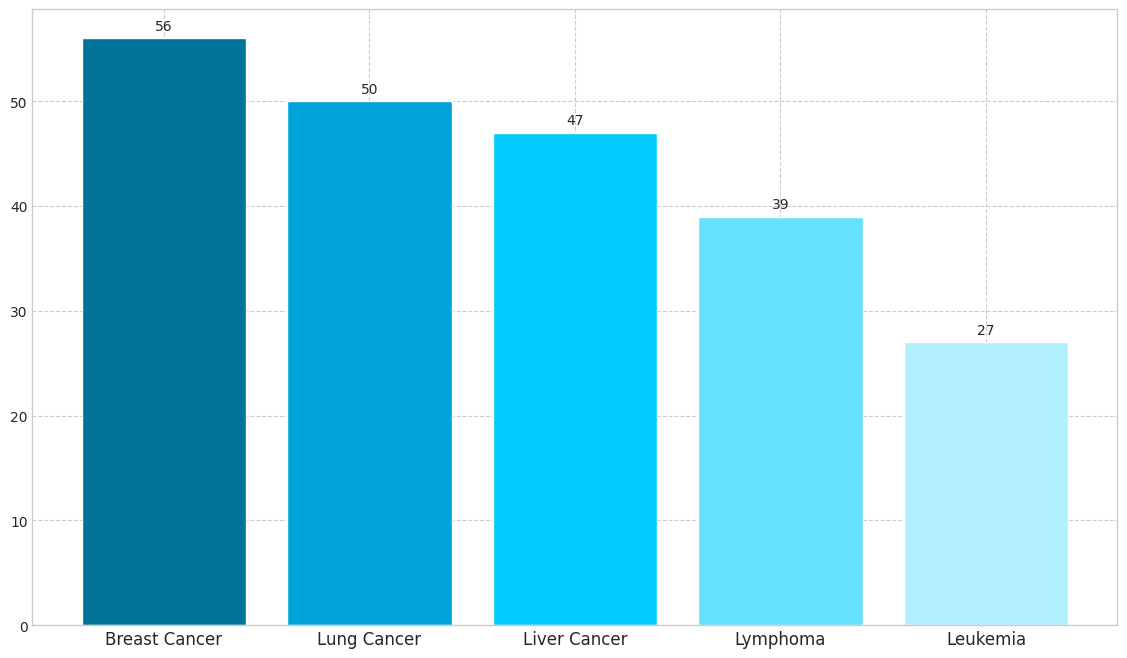

In [ ]:
plt.style.use('seaborn-whitegrid')
sns.set_style("whitegrid", {'grid.linestyle': '--'})

# Create color palette
colors = ['#007399', '#00a3d9', '#00ccff', '#66e0ff', '#b3f0ff']
# Create a bar chart
fig, ax = plt.subplots(figsize=(14, 8))

# Plot bars
bars = ax.bar(range(len(top_5_cancer_types)), top_5_cancer_types.values, color=colors)
# Add count number for each bar
for bar in bars:
  yval = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, int(yval), va='bottom', ha='center')

# Label the bars
ax.set_xticks(range(len(top_5_cancer_types)))
ax.set_xticklabels(['Breast Cancer', 'Lung Cancer', 'Liver Cancer', 'Lymphoma', 'Leukemia'], fontsize=12)

bars

# 2. ความคิดเห็นที่มีการมีส่วนร่วมสูงสุด
> ความคิดเห็นที่ได้รับความสนใจมากที่สุด โดยดูจากยอดไลค์และการตอบกลับ

In [ ]:
# Find the post with the highest likes and responses
pd.set_option('display.max_colwidth', None)  # Set the column width to unlimited
top_likes = docter_df.loc[docter_df['ยอดไลค์'].idxmax()]
top_likes

,3
name,Wansook Chompoo Ploy
comments,"#มะเร็งปากมดลูกระยะCINlll เกือบเข้าระยะ 1 ตอนอายุ 30... ตรวจpep.ทุกปี ไม่มีอะไรผิดปกติ วันดีคืนเดือด อยู่ๆภูมิแพ้ผิวหนังขึ้นทั้งวันทั้งคืน กินยายังไงก็ไม่ลง ทั้งๆที่ก่อนหน้านั้นก็รักษาภูมิแพ้ผิวหนังจนหายแล้ว เลยนึกขึ้นได้ว่า แพทย์ผิงหนังเคยเตือนว่า หากมีอาการภูมิแพ้แบบนี้อีก ให้ตรวจอย่างอื่นที่ผิดปกติร่วมด้วย ซึ่งมันคืออาการภูมิคุ้มกันบกพร่อง(ภูมิตก)แล้วแสดงสัญญาณทางผิวหนัง .... จึงไปตรวจpep.แบบคัดเชื้อhpvร่วมด้วย เพราะเป็นคน ปจด มาไม่ปกติตั้งแต่เด็กๆ ... สรุป นางมาจริง ทั้ง 16,18 ดุสุดทั้งคู่ ณ วันที่หมออ่านผลคือ CIN ll ระยะเวลารอทำcolpo. 1เดือน ผลcolpo. ขยับไป CIN lll หมอสั่งทำ Leep ทันที เพราะระยะเดินเร็วเกินไป แต่ก็ต้องรออีก1 เดือน เนื่องด้วยว่าคุณหมอคำนวนแล้วว่า น่าจะชนกัน ปจด ซึ่งอาจทำให้แผลหายช้าลงได้"
ยอดไลค์,1600
จำนวนการตอบกลับ,44
cancer_type,มะเร็งปากมดลูก


In [ ]:
top_responses = docter_df.loc[docter_df['จำนวนการตอบกลับ'].idxmax()]
top_responses

,1
name,Nubeer Kithiya
comments,เป็นมะเร็งลำไส้ใหญ่ ระยะที่ 3 ตอนอายุ 26 ค่ะ พฤติกรรมที่คิดว่ามีปัญหาคือ เลือกห้องน้ำที่จะอึ ถ้าไม่ใช่บ้าน หรือที่คุ้นเคย จะไม่ยอมถ่ายเลย จะอั้นไว้ ส่วนอาหารการกิน เราก็กินปกติ แบบคนทั่วไป ตามสั่ง ส้มตำ หมูทะ ชาบูบ้างตามโอกาส
ยอดไลค์,1400
จำนวนการตอบกลับ,70
cancer_type,มะเร็งลำไส้ใหญ่
